File: Video-Characteristics-Transcoding_EDA.ipynb  
Name: Corinne Medeiros  
Date: 7/4/21    
Desc: Analyzing Video Characteristics and Transcoding Time EDA   
Usage: Program imports and cleans data, generates charts, and calculates correlation.

In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm

import seaborn as sns

from scipy.stats import spearmanr
from scipy.stats import kendalltau

import yellowbrick
from yellowbrick.features import Rank2D  # correlation visualization package
from yellowbrick.style import set_palette  # color for yellowbrick visualizer

# Analyzing Video Characteristics and Transcoding Time

### Data Source  

**Online Video Characteristics and Transcoding Time Dataset**  
<https://archive.ics.uci.edu/ml/datasets/Online+Video+Characteristics+and+Transcoding+Time+Dataset>  

This dataset from the UCI Machine Learning Repository contains two tsv files. The first file is 168,286 randomly sampled YouTube videos from 2015 along with their video characteristics including duration, bitrate, height, width, frame rate, codec, category, and url. The second file is 68,784 different instances of transcoding tests using a sample of videos from the first file. A more detailed list of attributes can be found in the dataset description in the link above.

### Loading Videos Data

In [2]:
# Loading video data
videos_df = pd.read_csv('youtube_videos.tsv', sep='\t', header=0)

In [3]:
# Data summary
videos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168286 entries, 0 to 168285
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                168286 non-null  object 
 1   duration          168286 non-null  int64  
 2   bitrate           168286 non-null  int64  
 3   bitrate(video)    168286 non-null  int64  
 4   height            168286 non-null  int64  
 5   width             168286 non-null  int64  
 6   frame rate        168286 non-null  float64
 7   frame rate(est.)  168286 non-null  float64
 8   codec             168286 non-null  object 
 9   category          168286 non-null  object 
 10  url               168286 non-null  object 
dtypes: float64(2), int64(5), object(4)
memory usage: 14.1+ MB


In [4]:
# Summary of object variables
videos_df.describe(include='all')

,id,duration,bitrate,bitrate(video),height,width,frame rate,frame rate(est.),codec,category,url
count,168286,168286.000000,168286.00000,168286.000000,168286.000000,168286.000000,168286.000000,168286.000000,168286,168286,168286
unique,25489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,16,168216
top,5OVX-E-X3pM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,h264,People & Blogs,ERROR: unable to download video info webpage: ...
freq,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74996,37835,55
mean,NaN,271.654184,730.62149,624.363025,561.018706,368.399701,24.564592,19.884441,NaN,NaN,NaN
std,NaN,552.881871,919.15473,860.955654,359.071569,201.274180,7.396615,11.435070,NaN,NaN,NaN
min,NaN,1.000000,0.00000,0.000000,100.000000,88.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,55.000000,289.00000,231.000000,320.000000,240.000000,23.980000,12.000000,NaN,NaN,NaN
50%,NaN,145.000000,459.00000,349.000000,480.000000,360.000000,29.920000,25.000000,NaN,NaN,NaN
75%,NaN,289.000000,826.00000,640.000000,640.000000,480.000000,29.970000,29.970000,NaN,NaN,NaN


In [5]:
videos_df.head(10)

,id,duration,bitrate,bitrate(video),height,width,frame rate,frame rate(est.),codec,category,url
0,uDNj-_5ty48,267,373,274,568,320,29.97,0.00,h264,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...
1,uDNj-_5ty48,267,512,396,480,270,29.97,29.97,h264,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...
2,uDNj-_5ty48,267,324,263,400,226,29.97,29.97,flv1,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...
3,uDNj-_5ty48,267,85,55,176,144,12.00,12.00,mpeg4,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...
4,WCgt-AactyY,31,1261,1183,640,480,24.00,0.00,h264,People & Blogs,http://r1---sn-ovgq0oxu-5goe.c.youtube.com/vid...
5,WCgt-AactyY,31,1166,1183,640,480,24.00,0.00,vp8,People & Blogs,http://r1---sn-ovgq0oxu-5goe.c.youtube.com/vid...
6,WCgt-AactyY,31,736,646,480,360,24.00,0.00,h264,People & Blogs,http://r1---sn-ovgq0oxu-5goe.c.youtube.com/vid...
7,WCgt-AactyY,31,715,641,480,360,24.00,24.00,h264,People & Blogs,http://r1---sn-ovgq0oxu-5goe.c.youtube.com/vid...
8,WCgt-AactyY,31,762,641,480,360,24.00,24.00,vp8,People & Blogs,http://r1---sn-ovgq0oxu-5goe.c.youtube.com/vid...
9,WCgt-AactyY,31,370,305,320,240,24.00,24.00,flv1,People & Blogs,http://r1---sn-ovgq0oxu-5goe.c.youtube.com/vid...


In [6]:
# Checking missing data sums
videos_df.isna().sum()

id                  0
duration            0
bitrate             0
bitrate(video)      0
height              0
width               0
frame rate          0
frame rate(est.)    0
codec               0
category            0
url                 0
dtype: int64

It looks like we don't have any missing data, but there are duplicates. Each video exists in different formats, so that explains the duplicate ID's. Let's find out which codecs and categories are present. I'll also look at duration.

In [7]:
# Listing unique values from codecs and categories

print("Video Codecs:\n", videos_df.codec.unique())
print("\nVideo Categories:\n", videos_df.category.unique())

Video Codecs:
 ['h264' 'flv1' 'mpeg4' 'vp8' 'none']

Video Categories:
 ['Music' 'People & Blogs' 'Nonprofits & Activis' 'Sports'
 'News & Politics' 'Gaming' 'Comedy' 'Film & Animation' 'Entertainment'
 'Howto & Style' 'Autos & Vehicles' 'Education' 'Pets & Animals'
 'Travel & Events' 'Science & Technology' 'Shows']


### Visualizing Variables

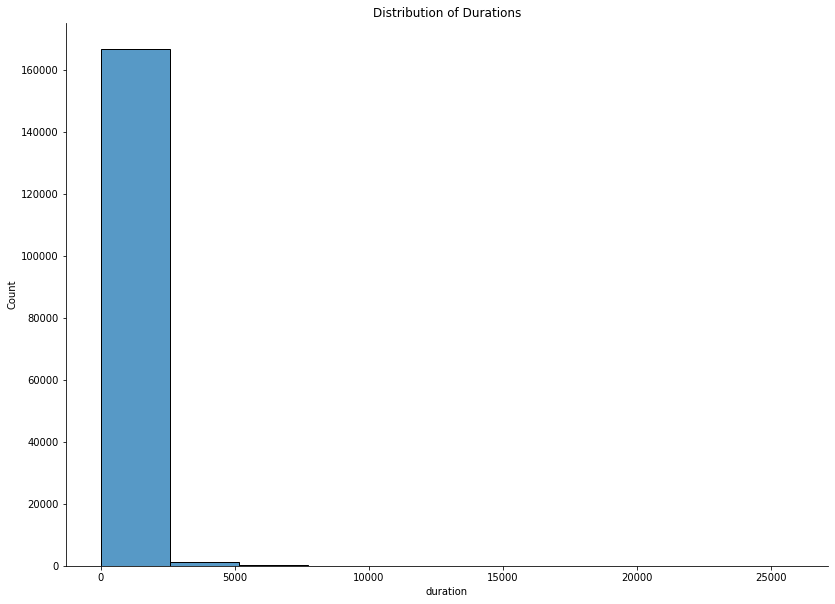

In [10]:
# Histogram of duration
ax = sns.displot( videos_df.duration, 
                 height=8.27, aspect=11.7/8.27, 
                 kde = False, bins = 10, color = 'tab:blue')
ax.set(title='Distribution of Durations')

It appears that most videos are under 40 minutes (2,500 seconds). 

<AxesSubplot:>

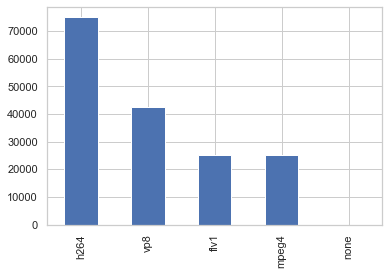

In [17]:
# Bar chart of codecs
videos_df['codec'].value_counts().plot(kind='bar')

### Loading Transcoding Data

In [7]:
# Loading transcode measurements data
transcode_df = pd.read_csv('transcoding_measurement.tsv', sep='\t', header=0)

In [9]:
# Data summary
transcode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68784 entries, 0 to 68783
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           68784 non-null  object 
 1   duration     68784 non-null  float64
 2   codec        68784 non-null  object 
 3   width        68784 non-null  int64  
 4   height       68784 non-null  int64  
 5   bitrate      68784 non-null  int64  
 6   framerate    68784 non-null  float64
 7   i            68784 non-null  int64  
 8   p            68784 non-null  int64  
 9   b            68784 non-null  int64  
 10  frames       68784 non-null  int64  
 11  i_size       68784 non-null  int64  
 12  p_size       68784 non-null  int64  
 13  b_size       68784 non-null  int64  
 14  size         68784 non-null  int64  
 15  o_codec      68784 non-null  object 
 16  o_bitrate    68784 non-null  int64  
 17  o_framerate  68784 non-null  float64
 18  o_width      68784 non-null  int64  
 19  o_he

In [10]:
# Summary of object variables
transcode_df.describe(include='all')

,id,duration,codec,width,height,bitrate,framerate,i,p,b,...,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
count,68784,68784.000000,68784,68784.000000,68784.000000,6.878400e+04,68784.000000,68784.000000,68784.000000,68784.000000,...,6.878400e+04,68784.0,6.878400e+04,68784,6.878400e+04,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000
unique,1099,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
top,3SQY-ZB8hmI,NaN,h264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,mpeg4,NaN,NaN,NaN,NaN,NaN,NaN
freq,841,NaN,31545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,17291,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,286.413921,NaN,624.934171,412.572226,6.937015e+05,23.241321,100.868312,6531.692210,9.147854,...,2.218057e+07,0.0,2.502294e+07,NaN,1.395036e+06,21.190862,802.336357,503.825541,228224.717900,9.996355
std,NaN,287.257650,NaN,463.169069,240.615472,1.095628e+06,7.224848,84.764791,6075.871744,92.516177,...,5.097306e+07,0.0,5.414402e+07,NaN,1.749352e+06,6.668703,609.959797,315.970438,97430.878373,16.107429
min,NaN,31.080000,NaN,176.000000,144.000000,8.384000e+03,5.705752,7.000000,175.000000,0.000000,...,3.384500e+04,0.0,1.918790e+05,NaN,5.600000e+04,12.000000,176.000000,144.000000,22508.000000,0.184000
25%,NaN,106.765000,NaN,320.000000,240.000000,1.343340e+05,15.000000,39.000000,2374.000000,0.000000,...,1.851539e+06,0.0,2.258222e+06,NaN,1.090000e+05,15.000000,320.000000,240.000000,216820.000000,2.096000
50%,NaN,239.141660,NaN,480.000000,360.000000,2.911500e+05,25.021740,80.000000,5515.000000,0.000000,...,6.166260e+06,0.0,7.881069e+06,NaN,5.390000e+05,24.000000,480.000000,360.000000,219480.000000,4.408000
75%,NaN,379.320000,NaN,640.000000,480.000000,6.529670e+05,29.000000,138.000000,9155.000000,0.000000,...,1.515506e+07,0.0,1.977335e+07,NaN,3.000000e+06,25.000000,1280.000000,720.000000,219656.000000,10.433000


In [5]:
transcode_df.head(20)

,id,duration,codec,width,height,bitrate,framerate,i,p,b,...,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,176,144,22508,0.612
1,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,320,240,25164,0.980
2,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,480,360,29228,1.216
3,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,640,480,34316,1.692
4,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,1280,720,58528,3.456
5,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,1920,1080,102072,6.320
6,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,15.0,176,144,23132,0.728
7,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,15.0,320,240,25164,0.944
8,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,15.0,480,360,29236,1.476
9,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,15.0,640,480,34312,1.964


In [11]:
# Checking missing data sums
transcode_df.isna().sum()

id             0
duration       0
codec          0
width          0
height         0
bitrate        0
framerate      0
i              0
p              0
b              0
frames         0
i_size         0
p_size         0
b_size         0
size           0
o_codec        0
o_bitrate      0
o_framerate    0
o_width        0
o_height       0
umem           0
utime          0
dtype: int64

In [12]:
# Listing unique values from codecs

print("Video Codecs:\n", transcode_df.codec.unique())

Video Codecs:
 ['mpeg4' 'h264' 'vp8' 'flv']


<AxesSubplot:>

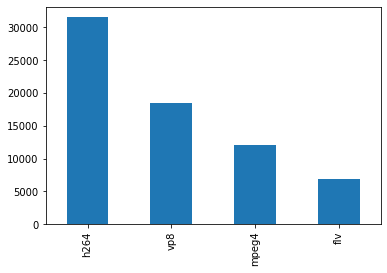

In [16]:
# Bar chart of codecs
transcode_df['codec'].value_counts().plot(kind='bar')

Here we can see that the most common codec in the transcoded observations is H264. 

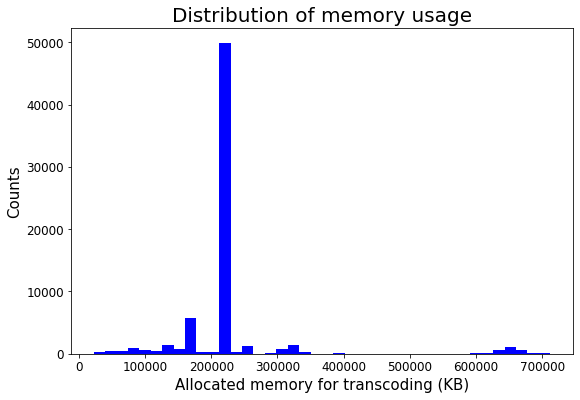

In [11]:
# Setting figure and size
plt.figure(figsize=(9, 6))
plt.subplot()

# Histogram of memory usage
plt.hist(transcode_df.umem, color='blue', bins=40)
plt.title("Distribution of memory usage", fontsize=20)
plt.xlabel('Allocated memory for transcoding (KB)', fontsize=15)  # Adding an x-label
plt.ylabel('Counts', fontsize=15)  # Adding a y-label
plt.tick_params(axis='both', labelsize=12)  # Setting font size of labels

plt.show()

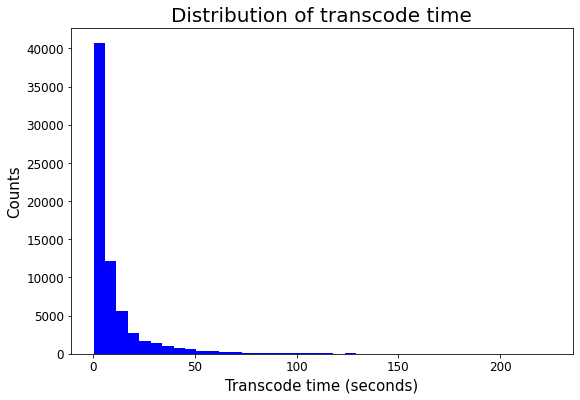

In [13]:
# Setting figure and size
plt.figure(figsize=(9, 6))
plt.subplot()

# Histogram of transcode time
plt.hist(transcode_df.utime, color='blue', bins=40)
plt.title("Distribution of transcode time", fontsize=20)
plt.xlabel('Transcode time (seconds)', fontsize=15)  # Adding an x-label
plt.ylabel('Counts', fontsize=15)  # Adding a y-label
plt.tick_params(axis='both', labelsize=12)  # Setting font size of labels

plt.show()

### Correlation: Pearson Ranking charts  

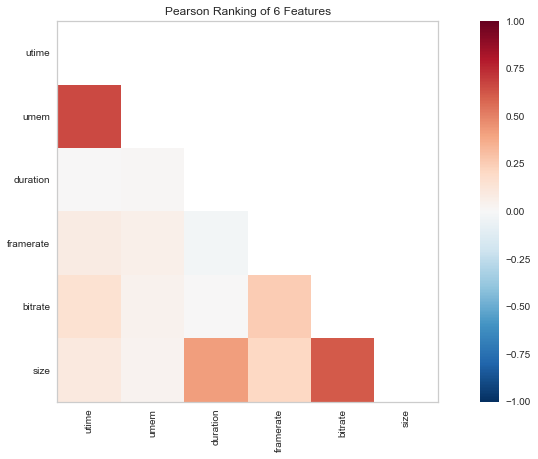

In [17]:
# Pearson Ranking

#set up the figure size
plt.rcParams['figure.figsize'] = (15, 7)

features = ['utime', 'umem', 'duration', 'framerate', 'bitrate', 'size']

# extract the numpy arrays from the data frame
X = transcode_df[features].values

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="pearson_ranking.png") # Draw/show/poof the data
plt.show()

Here we can see that memory usage (umem) is highly correlated with transcode time. Bit rate and duration are also positively correlated with size, which makes sense. The rest of the relationships are very insignificant.